In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 10.0)

In [99]:
#load data
game_15 = pd.read_csv('./data/game_2015.csv')
qb_15 = pd.read_csv('./data/qb_15.csv')
rev_15 = pd.read_csv('./data/rev_2015.csv')
team_15 = pd.read_csv('./data/team_2015.csv')

#difference in team names
print 'Team names in qb_15 not in game_15 data:\n {}'.format([i for i in qb_15.Tm if i not in game_15.h_name.tolist()])
print 'Team names in rev_15 not in game_15 data:\n {}'.format([i for i in rev_15.Team if i not in game_15.h_name.tolist()])
print 'Team names in team_15 not in game_15 data:\n {}\n'.format([i for i in team_15.Tm if i not in game_15.h_name.tolist()])
tm_map = {'NOR':'NO', 'KAN':'KC', 'GNB':'GB', 'SDG':'SD', 'TAM':'TB', 'SFO':'SF','JAX':'JAC'}

#replace team names
qb_15['Tm'] = qb_15['Tm'].replace(tm_map)
rev_15['Team'] = rev_15['Team'].replace(tm_map)
team_15['Tm'] = team_15['Tm'].replace(tm_map)
team_15['score_diff'] = team_15.score - team_15.oppo_score
#team_15.drop(['score', 'oppo_score'], axis = 1, inplace = True)

#Table join
data_15 = game_15.drop(['h_score', 'a_score'], axis = 1)
#QB
data_15 = pd.merge(data_15, qb_15, left_on='h_name', right_on='Tm')
data_15 = pd.merge(data_15, qb_15, left_on='a_name', right_on='Tm', suffixes=('_home', '_away'))
#REV
data_15 = pd.merge(data_15, rev_15, left_on='h_name', right_on='Team')
data_15 = pd.merge(data_15, rev_15, left_on='a_name', right_on='Team', suffixes=('_home','_away'))
#SCORE_DIFF
data_15 = pd.merge(data_15, team_15, left_on='h_name', right_on='Tm')
data_15 = pd.merge(data_15, team_15, left_on='a_name', right_on='Tm', suffixes=('_home','_away'))

#clean up
data_15['age_diff'] = data_15.Age_home - data_15.Age_away
data_15['qbr_diff'] = data_15.QBR_home - data_15.QBR_away
data_15['rev_diff'] = data_15.value_2015_home - data_15.value_2015_away
data_15['score_diff'] = data_15.score_diff_home - data_15.score_diff_away
data_15['injury_diff'] = data_15.injure_home - data_15.injure_away
data_15['result_diff'] = data_15.h_min_a

col_names = [i for i in data_15.columns if i.endswith('diff')]
data_15 = data_15[col_names]
assert np.sum(data_15.isnull().sum()) == 0

Team names in qb_15 not in game_15 data:
 ['NOR', 'KAN', 'GNB', 'SDG', 'TAM', 'SFO', 'JAX']
Team names in rev_15 not in game_15 data:
 ['JAX']
Team names in team_15 not in game_15 data:
 ['JAX']



In [116]:
#same thing with 2016 data
game_16 = pd.read_csv('./data/game_2016.csv')
qb_16 = pd.read_csv('./data/qb_16.csv')
rev_16 = pd.read_csv('./data/rev_2016.csv')
team_16 = pd.read_csv('./data/team_2016.csv')
print 'Team names in qb_16 not in game_16 data:\n {}'.format([i for i in qb_16.Tm if i not in game_16.h_name.tolist()])
print 'Team names in rev_16 not in game_16 data:\n {}'.format([i for i in rev_16.Team if i not in game_16.h_name.tolist()])
print 'Team names in team_16 not in game_16 data:\n {}\n'.format([i for i in team_16.Tm if i not in game_16.h_name.tolist()])
qb_16['Tm'] = qb_16['Tm'].replace(tm_map)
rev_16['Team'] = rev_16['Team'].replace(tm_map)
team_16['Tm'] = team_16['Tm'].replace(tm_map)
team_16['score_diff'] = team_16.score - team_16.oppo_score
team_16.drop(['score', 'oppo_score'], axis = 1, inplace = True)

data_16 = game_16.drop(['h_score', 'a_score'], axis = 1)
data_16 = pd.merge(data_16, qb_16, left_on='h_name', right_on='Tm')
data_16 = pd.merge(data_16, qb_16, left_on='a_name', right_on='Tm', suffixes=('_home', '_away'))
data_16 = pd.merge(data_16, rev_16, left_on='h_name', right_on='Team')
data_16 = pd.merge(data_16, rev_16, left_on='a_name', right_on='Team', suffixes=('_home','_away'))
data_16 = pd.merge(data_16, team_16, left_on='h_name', right_on='Tm')
data_16 = pd.merge(data_16, team_16, left_on='a_name', right_on='Tm', suffixes=('_home','_away'))

data_16['age_diff'] = data_16.Age_home - data_16.Age_away
data_16['qbr_diff'] = data_16.QBR_home - data_16.QBR_away
data_16['rev_diff'] = data_16.value_home - data_16.value_away
data_16['score_diff'] = data_16.score_diff_home - data_16.score_diff_away
data_16['injury_diff'] = data_16.injure_home - data_16.injure_away
data_16['result_diff'] = data_16.h_min_a

col_names = [i for i in data_16.columns if i.endswith('diff')]
data_16 = data_16[col_names]
data = pd.concat([data_15, data_16], axis = 0)
data['result'] = [0 if i < 0 else 1 for i in data['result_diff']] 
assert np.sum(data_16.isnull().sum()) == 0

Team names in qb_16 not in game_16 data:
 ['GNB', 'NOR', 'KAN', 'TAM', 'SDG', 'SFO', 'LAR', nan]
Team names in rev_16 not in game_16 data:
 []
Team names in team_16 not in game_16 data:
 []



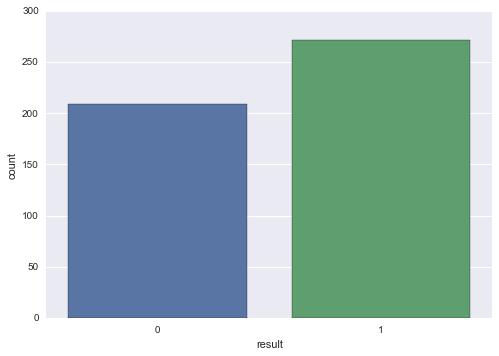

In [127]:
sns.countplot(data.result)
#balanced label

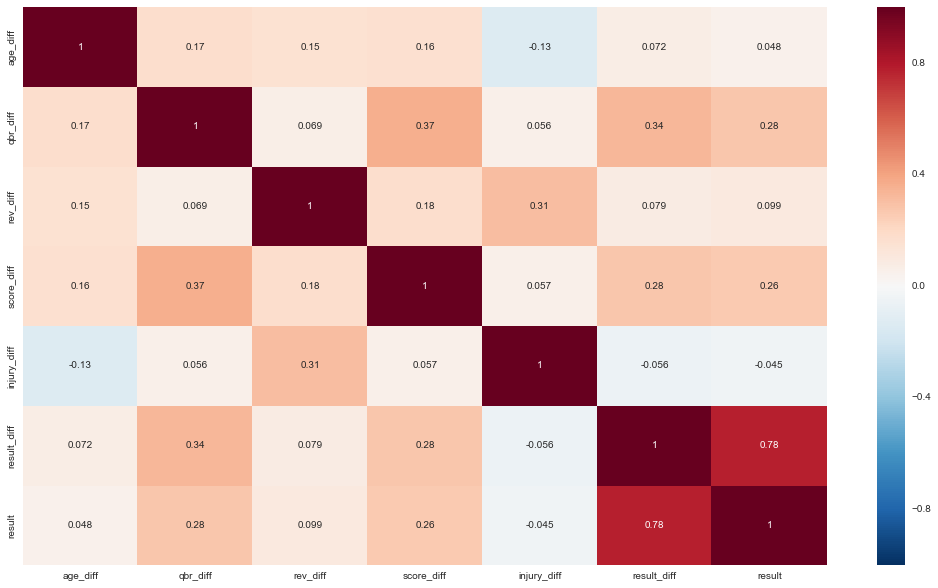

In [117]:
#correlations
fig = plt.figure()
sns.set(font_scale=1)
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 10})

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = data.drop(['result', 'result_diff', 'injury_diff'], axis = 1)
Y = data['result']

#standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.hstack([X, data['injury_diff'].values.reshape(-1,1)])

train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3, random_state=0)

params = {'C':[0.1, 0.5, 1, 5, 10]}
clf = GridSearchCV(LogisticRegression(), params, cv=5, n_jobs=-1).fit(train_x, train_y)

logistic_regression_accuracy = 100* clf.score(test_x, test_y)
print 'Logistic Regreesion accuracy: {}%'.format(logistic_regression_accuracy)

Logistic Regreesion accuracy: 61.3793103448%


In [233]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
LDA_accuracy = 100*LDA.score(test_x, test_y)
print 'LDA accuracy: {}%'.format(LDA_accuracy)

LDA accuracy: 61.3793103448%


In [234]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(train_x, train_y)
naive_beyas_accuracy = 100*clf.score(test_x, test_y)
print 'Naive Beyas accuracy: {}%'.format(naive_beyas_accuracy)

Naive Beyas accuracy: 55.1724137931%


In [204]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth':[1, 2, 3]}
RF = RandomForestClassifier(n_estimators=150, n_jobs=-1)
clf = GridSearchCV(RF, params, cv=5).fit(train_x, train_y)
print clf.best_params_

random_forest_accuracy = 100*clf.score(test_x, test_y)
print 'Random Forest accuracy: {}%'.format(random_forest_accuracy)

{'max_depth': 2}
Random Forest accuracy: 62.0689655172%


In [205]:
from sklearn.ensemble import AdaBoostClassifier

params = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1]}
Ada = AdaBoostClassifier(random_state=0, n_estimators=300)
clf = GridSearchCV(Ada, params, cv=3).fit(train_x, train_y)
print clf.best_params_

Ada_accuracy = 100*clf.score(test_x, test_y)
print 'AdaBoosting accuracy: {}%'.format(Ada_accuracy)

{'learning_rate': 0.01}
AdaBoosting accuracy: 60.0%


In [206]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'learning_rate':[0.01, 0.1,0.5], 'max_depth':[2,3]}
GB = GradientBoostingClassifier(n_estimators=300)
clf = GridSearchCV(GB, params, cv=3).fit(train_x, train_y)
print clf.best_params_

GB_accuracy = 100*clf.score(test_x, test_y)
print 'GradientBoosting accuracy: {}%'.format(GB_accuracy)

{'learning_rate': 0.01, 'max_depth': 2}
GradientBoosting accuracy: 57.2413793103%


In [199]:
from sklearn.svm import SVC
params = {'kernel':['linear', 'rbf'], 'C':[0.01, 0.05, 0.1,0.5, 1]}
SVM = SVC()
clf = GridSearchCV(SVM, params, cv=3).fit(train_x, train_y)
print clf.best_params_

SVM_accuracy = 100*clf.score(test_x, test_y)
print 'SVM accuracy: {}%'.format(SVM_accuracy)

{'kernel': 'linear', 'C': 0.1}
SVM accuracy: 59.3103448276%


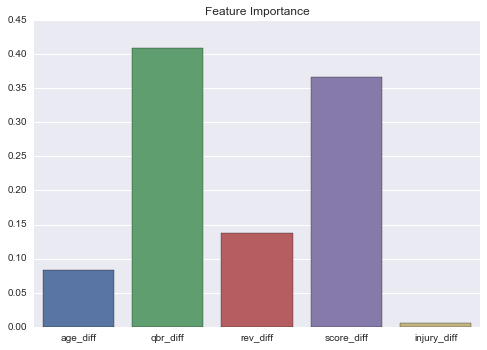

In [237]:
#feature importance
clf = RandomForestClassifier(n_estimators=150, max_depth=2).fit(train_x, train_y)
feature_importances = clf.feature_importances_

feature_names = data.drop(['result', 'result_diff'], axis = 1).columns
feature_importances = pd.Series(feature_importances, index=feature_names)

ax = sns.barplot(x=feature_importances.index, y=feature_importances)
ax.set_title('Feature Importance')

## Next Steps:
1. Model ensembling? (Majority vote?)
2. More features?